In [ ]:
# This project is based on web scrapping using BeautifulSoup. 
# Most of the brands are promoting Black Friday and Christmas Discounts on their products.
# For this project, I have selected a website which sells dj controllers and other related equipment with different discount offers
# Through this project, we can calculate the % Discount on each Dj Controller and choose the right product with maximum savings.

In [26]:
import bs4


In [27]:
#Importing urlopen from urllib.rquest to fetch internet resources
#Importing BestifulSoup
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup

In [28]:
my_url = 'https://www.storedj.com.au/dj-equipment/dj-controllers?SortProduct=SaveValue%20DESC&PageProduct=1'

In [29]:
#Opening the connection and grabbing the page
uClient = uReq(my_url)
page_html= uClient.read()

#Closing the client
uClient.close()

In [30]:
#Data Derived from Beautiful Soup Package | HTML Parsing
page_soup = soup(page_html,"html.parser")

In [31]:
# Checking h1 tags
page_soup.h1

<h1 class="page-title ico-heading">DJ Controllers</h1>

In [32]:
# Checking P tags
page_soup.p

<p class="promo-title">5 Store Locations</p>

In [33]:
# Checking Span Class
page_soup.body.span

<span class="topbar-copy">Australia's Largest Range Of Pro Audio Equipment</span>

In [34]:
#Fetching all div with class "Product"
containers = page_soup.findAll("div",{"class":"product"})

In [35]:
#Checking Container Lenght
len(containers)

15

In [36]:
#Checking container at index 0
containers[0]

<div class="product " data-current-pickup-store-name="" data-enable-store-availability-click-and-collect="true" data-hide-footer-zone="false" data-is-favourite="false" data-is-user-favourites-page="false" data-items-on-order="0" data-product-code="PIO-DDJRZX" data-product-data="" data-qty-on-back-order="0" data-rc-quick-view-close-button-html='&lt;div class="close-overlay cv-ico-general-cross3"&gt;Close&lt;/div&gt;' data-rc-quick-view-slide-toggle-selector=".cv-zone-product-3 .close-overlay" data-rc-quick-view-zone-selector=".cv-zone-product-3" data-role="product" data-show-delivery-available="true" data-show-delivery-available-back-order="false" data-show-delivery-available-five-to-seven-days="false" data-show-delivery-available-three-to-six-days="false" data-show-delivery-available-two-to-five-days="false" data-show-delivery-indent-product-call="false" data-show-delivery-select-product-attributes="false" data-show-delivery-special-order="false" data-show-delivery-store-not-set="false

In [37]:
#Assigning the containers to variable container
container = containers[0]

In [38]:
#Checking the details inside container 'a' class
container.a

<a data-product-link="PIO-DDJRZX" href="/pioneer-ddjrzx-pro-4-channel-rekordbox-dj-controller">
<img class="product-img" data-bind="attr: { src: imageSrc, alt: imageAltTag, title: imageAltTag }, updateWidgetValueFromAttr: { imageSrc: imageSrc, imageAltTag: imageAltTag, masterImageSrc: masterImageSrc, masterImageAltTag: masterImageAltTag, integratedChildImagePath: integratedChildImagePath }" data-image-alt-tag="Pioneer DDJRZX Pro 4-Channel Rekordbox DJ Controller" data-image-src="/Images/ProductImages/250/PIO-DDJRZX.jpg" data-integrated-child-image-path="/Images/ProductImages/250" data-master-image-alt-tag="Pioneer DDJRZX Pro 4-Channel Rekordbox DJ Controller" data-master-image-src="/Images/ProductImages/250/PIO-DDJRZX.jpg"/>
</a>

In [39]:
#Checking Container 'div'
container.div

<div data-view="true">
<div class="cv-zone-product-1">
<div class="widget-productlist-image ">
<a data-product-link="PIO-DDJRZX" href="/pioneer-ddjrzx-pro-4-channel-rekordbox-dj-controller">
<img class="product-img" data-bind="attr: { src: imageSrc, alt: imageAltTag, title: imageAltTag }, updateWidgetValueFromAttr: { imageSrc: imageSrc, imageAltTag: imageAltTag, masterImageSrc: masterImageSrc, masterImageAltTag: masterImageAltTag, integratedChildImagePath: integratedChildImagePath }" data-image-alt-tag="Pioneer DDJRZX Pro 4-Channel Rekordbox DJ Controller" data-image-src="/Images/ProductImages/250/PIO-DDJRZX.jpg" data-integrated-child-image-path="/Images/ProductImages/250" data-master-image-alt-tag="Pioneer DDJRZX Pro 4-Channel Rekordbox DJ Controller" data-master-image-src="/Images/ProductImages/250/PIO-DDJRZX.jpg"/>
</a>
<!-- Product Ribbon Group -->
<aside class="product-ribbons">
<img src="/Themes/BPDTHEME01/theme-client-updates/img/ribbons/ribbon-sale.png"/>
</aside>
</div>
</div>

In [40]:
#Checking inside the right 'div' and 'a' class to fetch required data
container.div.div.a

<a data-product-link="PIO-DDJRZX" href="/pioneer-ddjrzx-pro-4-channel-rekordbox-dj-controller">
<img class="product-img" data-bind="attr: { src: imageSrc, alt: imageAltTag, title: imageAltTag }, updateWidgetValueFromAttr: { imageSrc: imageSrc, imageAltTag: imageAltTag, masterImageSrc: masterImageSrc, masterImageAltTag: masterImageAltTag, integratedChildImagePath: integratedChildImagePath }" data-image-alt-tag="Pioneer DDJRZX Pro 4-Channel Rekordbox DJ Controller" data-image-src="/Images/ProductImages/250/PIO-DDJRZX.jpg" data-integrated-child-image-path="/Images/ProductImages/250" data-master-image-alt-tag="Pioneer DDJRZX Pro 4-Channel Rekordbox DJ Controller" data-master-image-src="/Images/ProductImages/250/PIO-DDJRZX.jpg"/>
</a>

In [49]:
# Creating file with the required fetched data
# Using 'For loop' to iterate over each line item - brand name, product price & discount price
filename = "products1.csv"
f = open(filename,"w")
headers = "brand , price , discount \n"  
f.write(headers)

for container in containers:
    brand = container.div.div.a.img["data-image-alt-tag"]
    product_price = container.findAll("span",{"class":"item-price"})
    price = product_price[0].text
    discount_price = container.findAll("span",{"class":"price-sale-save-item"})
    discount = discount_price[0].text
    print("brand: " + brand)
    print("price: " + price)
    print("discount:" + discount)
    
    f.write(brand + "," + price + "," + discount + "\n")
    
f.close() 

brand: Pioneer DDJRZX Pro 4-Channel Rekordbox DJ Controller
price: $3999
discount:Save $0
brand: Pioneer DDJRZ Pro 4-Channel Rekordbox DJ Controller w/ Performance Pads
price: $2999
discount:Save $0
brand: Pioneer DDJSZ2 Four Channel Premium Serato DJ Controller
price: $2999
discount:Save $0
brand: OPEN BOX Pioneer DDJRZX Pro Rekordbox DJ/VJ Controller
price: $3499
discount:Save $500
brand: Pioneer XDJRX2 All-in-One DJ System for Rekordbox
price: $2349
discount:Save $0
brand: OPEN BOX Native Instruments Traktor Kontrol S8
price: $1299
discount:Save $400
brand: Pioneer XDJRR All-in-One DJ System for Rekordbox
price: $1699
discount:Save $0
brand: Pioneer DDJ1000 4 Channel Rekordbox DJ Controller w/ Jog Display & Performance Pads
price: $1699
discount:Save $0
brand: Pioneer DDJSX3 4-Channel Serato DJ Pro Controller
price: $1599
discount:Save $0
brand: Native Instruments Traktor Kontrol S8 Flagship All-In-One 4-Channel DJ System
price: $1388
discount:Save $311
brand: Korg Kaoss DJ Controll

In [103]:
#Importing Pandas
import pandas as pd


In [104]:
#Reading the fetched CSV File
df = pd.read_csv("C:/Users/rmokashi/Documents/Individual Assignment/products.csv")

df.to_csv('C:/Users/rmokashi/Documents/Individual Assignment/products.csv')


In [105]:
#Showing the column names
list(df.columns.values)

['Brand ', 'Price', ' Discount ']

In [106]:
#Showing the head of the dataframe df
df.head()

,Brand,Price,Discount
0,Denon MC7000 Professional,1184,215
1,Korg Kaoss DJ Controller,295,304
2,Native Instruments Traktor Kontrol D2,345,204
3,Native Instruments Traktor Kontrol S5,648,251
4,Native Instruments Traktor Kontrol S8,1388,311


In [113]:
#Calculating Percent Discount
df2 = pd.DataFrame({"Price": [1184, 295, 345, 648, 1388 ,1299 ,3499 ,1349, 1699, 2999 ,3999, 1599 ,2999, 1699, 2349],
                   "Discount": [215,304,204,251,311,400,500,250,0,0,0,0,0,0,0]})

df['Percent_Discount'] = ((df2["Discount"] /( df2["Price"]+df2["Discount"]) ))*100

In [130]:
#Overview of df dataframe updated with percent discount
df

,Brand,Price,Discount,Percent_Discount
0,Denon MC7000 Professional,1184,215,15.368120
1,Korg Kaoss DJ Controller,295,304,50.751252
2,Native Instruments Traktor Kontrol D2,345,204,37.158470
3,Native Instruments Traktor Kontrol S5,648,251,27.919911
4,Native Instruments Traktor Kontrol S8,1388,311,18.304885
5,OPEN BOX Native Instruments Traktor Kontrol S8,1299,400,23.543261
6,OPEN BOX Pioneer DDJRZX Pro Rekordbox,3499,500,12.503126
7,OPEN BOX Pioneer DDJSX3,1349,250,15.634772
8,Pioneer DDJ1000 4,1699,0,0.000000
9,Pioneer DDJRZ Pro 4,2999,0,0.000000


In [119]:
#Importing matplotlib
import matplotlib.pyplot as plt

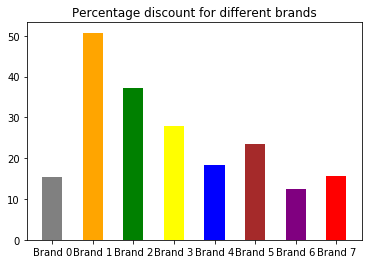

,Brand,Price,Discount,Percent_Discount
0,Denon MC7000 Professional,1184,215,15.368120
1,Korg Kaoss DJ Controller,295,304,50.751252
2,Native Instruments Traktor Kontrol D2,345,204,37.158470
3,Native Instruments Traktor Kontrol S5,648,251,27.919911
4,Native Instruments Traktor Kontrol S8,1388,311,18.304885
5,OPEN BOX Native Instruments Traktor Kontrol S8,1299,400,23.543261
6,OPEN BOX Pioneer DDJRZX Pro Rekordbox,3499,500,12.503126
7,OPEN BOX Pioneer DDJSX3,1349,250,15.634772
8,Pioneer DDJ1000 4,1699,0,0.000000
9,Pioneer DDJRZ Pro 4,2999,0,0.000000


In [188]:
#Plotting the bar diagram of products with percent discount
#Numbers 0 to 7 on 'x axis' are the brands according to index position in dataframe
ax = (1,2,3,4,5,6,7)
ay = df.iloc[:7,3]
a1= plt.bar("Brand 0", df.iloc[0,3], color= 'gray',width=.5)
a2 =plt.bar('Brand 1',df.iloc[1,3], color= 'orange',width=.5 )
a3 =plt.bar('Brand 2',df.iloc[2,3], color= 'green',width=.5)
a4 =plt.bar('Brand 3',df.iloc[3,3], color= 'yellow',width=.5)
a4 =plt.bar('Brand 4',df.iloc[4,3], color= 'blue',width=.5)
a5 =plt.bar('Brand 5',df.iloc[5,3], color= 'brown',width=.5)
a6 =plt.bar('Brand 6',df.iloc[6,3], color= 'purple',width=.5)
a7 =plt.bar('Brand 7',df.iloc[7,3], color= 'red',width=.5)
plt.title("Percentage discount for different brands")
plt.show()
df